In [380]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
import itertools

In [292]:
bank = pd.read_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/bank2.csv', index_col=0)

In [293]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Age_Group_1,Age_Group_2,est_av_salary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,50-59,55-64,21936.0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,40-49,35-44,13032.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,30-39,25-34,NaN
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0,30-39,35-44,21936.0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0,Below 30,25-34,21936.0


columns to one hot encode

In [294]:
bank['default'].replace ('no', 0, inplace=True)
bank['default'].replace ('yes', 1, inplace=True)

In [295]:
bank['housing'].replace ('no', 0, inplace=True)
bank['housing'].replace ('yes', 1, inplace=True)

In [296]:
bank['loan'].replace ('no', 0, inplace=True)
bank['loan'].replace ('yes', 1, inplace=True)

In [297]:
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')

In [298]:
#Creating a variable X_ohe that has been fit and transformed
job_ohe = ohe.fit_transform(bank[['job',"marital"]].values)

Creating dummy variables with categorical data

Job Column

In [299]:
job_dummy = pd.get_dummies(bank['job'], prefix='job', drop_first=True)

In [300]:
job_dummy.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


Marital

In [301]:
marital_dummy = pd.get_dummies(bank['marital'], prefix='marital', drop_first=True)

In [302]:
marital_dummy.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [303]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Age_Group_1,Age_Group_2,est_av_salary
0,58,management,married,tertiary,0,2143,1,0,5,may,4.35,1,-1,0,unknown,no,0,50-59,55-64,21936.0
1,44,technician,single,secondary,0,29,1,0,5,may,2.52,1,-1,0,unknown,no,0,40-49,35-44,13032.0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,1.27,1,-1,0,unknown,no,0,30-39,25-34,NaN
3,35,management,married,tertiary,0,231,1,0,5,may,2.32,1,-1,0,unknown,no,0,30-39,35-44,21936.0
4,28,management,single,tertiary,0,447,1,1,5,may,3.62,1,-1,0,unknown,no,0,Below 30,25-34,21936.0


Education

In [305]:
education_dummy = pd.get_dummies(bank['education'], prefix='edu', drop_first=True)

In [306]:
education_dummy.head()

,edu_secondary,edu_tertiary
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


Day

In [307]:
day_dummy = pd.get_dummies(bank['day'], prefix='day', drop_first=True)

In [308]:
day_dummy.head()

,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
month_dummy = pd.get_dummies(bank['month'], prefix='month', drop_first=True)

In [310]:
month_dummy.head()

,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


poutcome

In [311]:
poutcome_dummy = pd.get_dummies(bank['poutcome'], prefix='poutcome', drop_first=False)

In [312]:
poutcome_dummy.drop(columns='poutcome_unknown', axis=1, inplace=True)

In [313]:
poutcome_dummy.head()

,poutcome_failure,poutcome_success
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Age Group 2 

In [314]:
Age_Group_2_dummy = pd.get_dummies(bank['Age_Group_2'], prefix='age_2', drop_first=True)

In [315]:
Age_Group_2_dummy.head()

,age_2_25-34,age_2_35-44,age_2_45-54,age_2_55-64,age_2_65-74,age_2_75-79,age_2_80+
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [316]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,Age_Group_1,Age_Group_2,est_av_salary
0,58,management,married,tertiary,0,2143,1,0,5,may,4.35,1,-1,0,unknown,no,0,50-59,55-64,21936.0
1,44,technician,single,secondary,0,29,1,0,5,may,2.52,1,-1,0,unknown,no,0,40-49,35-44,13032.0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,1.27,1,-1,0,unknown,no,0,30-39,25-34,NaN
3,35,management,married,tertiary,0,231,1,0,5,may,2.32,1,-1,0,unknown,no,0,30-39,35-44,21936.0
4,28,management,single,tertiary,0,447,1,1,5,may,3.62,1,-1,0,unknown,no,0,Below 30,25-34,21936.0


In [317]:
bank_copy = bank.copy()

In [318]:
bank_copy.drop(columns=['age', "education", "job", "marital",'day',"month","poutcome", 'response',"Age_Group_1", "Age_Group_2", 'est_av_salary'], axis=1, inplace=True)

In [319]:
bank_copy.head()

,default,balance,housing,loan,duration,campaign,pdays,previous,response_binary
0,0,2143,1,0,4.35,1,-1,0,0
1,0,29,1,0,2.52,1,-1,0,0
2,0,2,1,1,1.27,1,-1,0,0
3,0,231,1,0,2.32,1,-1,0,0
4,0,447,1,1,3.62,1,-1,0,0


In [320]:
bank_copy = pd.concat([bank_copy,job_dummy, marital_dummy, education_dummy, day_dummy, month_dummy, poutcome_dummy, Age_Group_2_dummy], axis=1  )

In [321]:
bank_copy.head()

,default,balance,housing,loan,duration,campaign,pdays,previous,response_binary,job_blue-collar,...,month_sep,poutcome_failure,poutcome_success,age_2_25-34,age_2_35-44,age_2_45-54,age_2_55-64,age_2_65-74,age_2_75-79,age_2_80+
0,0,2143,1,0,4.35,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,29,1,0,2.52,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2,1,1,1.27,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,231,1,0,2.32,1,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,447,1,1,3.62,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [322]:
X = bank_copy.drop(columns='response_binary', axis=1)
y = bank_copy['response_binary']

Train Test Split

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)

In [324]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25, random_state = 42)

In [325]:
#Checking to see the size of each set.
print('Shapes of Each Set')
print('-------------------')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'y_val: {y_val.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Shapes of Each Set
-------------------
X_train: (24504, 73)
y_train: (24504,)
X_val: (8168, 73)
y_val: (8168,)
X_test: (8169, 73)
y_test: (8169,)


Baseline model

In [326]:
logreg = LogisticRegression(penalty='none', solver='lbfgs')
log_reg = logreg.fit(X_train, y_train)
log_reg

//anaconda3/envs/oy-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [327]:
log_reg_yval_predproba = log_reg.predict_proba(X_val)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_val, log_reg_yval_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.8786298103178359


In [328]:
log_reg_ytrain_predproba = log_reg.predict_proba(X_train)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_train, log_reg_ytrain_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.8731896283082777


In [329]:
log_reg_ytest_predproba = log_reg.predict_proba(X_test)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_test, log_reg_ytest_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.8820433758729394


In [330]:
y_hat_test = log_reg.predict(X_test)

In [359]:

print('Confusion Matrix:\n', confusion_matrix(y_test, y_hat_test))

Confusion Matrix:
 [[7032  134]
 [ 750  253]]


In [392]:
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[7032  134]
 [ 750  253]]


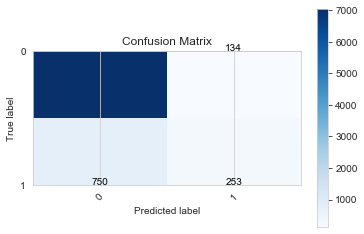

In [396]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [385]:
def conf_matrix(learner, X_data, y_data):
    y_hat_cm = learner.predict(X_data)
    cnf_matrix = confusion_matrix(y_data, y_hat_cm)
#     print('Confusion Matrix:\n', def_cm)
#     print("--------------------")
#     print('True Negative:', def_cm[0][0])
#     print('False Positive:', def_cm[0][1])
#     print('False Negative:', def_cm[1][0])
#     print('True Positive:', def_cm[1][0])
    
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')

    # Add a legend
    plt.colorbar()
    plt.show()

In [389]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[7032  134]
 [ 750  253]]


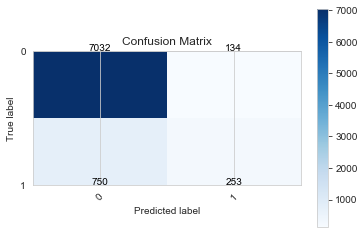

In [391]:
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
class_names = set(y) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cnf_matrix.max() 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')
plt.colorbar()
plt.show()

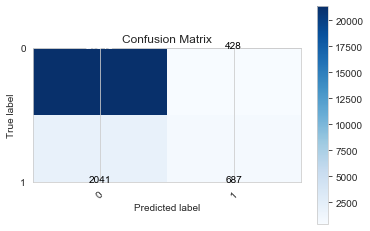

In [386]:
conf_matrix(log_reg, X_train, y_train)

In [377]:
conf_matrix(log_reg, X_test, y_test)

Confusion Matrix:
 [[7032  134]
 [ 750  253]]
--------------------
True Negative: 7032
False Positive: 134
False Negative: 750
True Positive: 750


In [340]:
TN = 7032
FP = 134
FN = 750
TP = 253

In [341]:
Total_Pred = TN + FP + FN + TP

In [342]:
Precision = TP / (TP+FP)
Precision

0.6537467700258398

In [343]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

//anaconda3/envs/oy-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [344]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8820433758729394


AUC: 0.8820433758729394


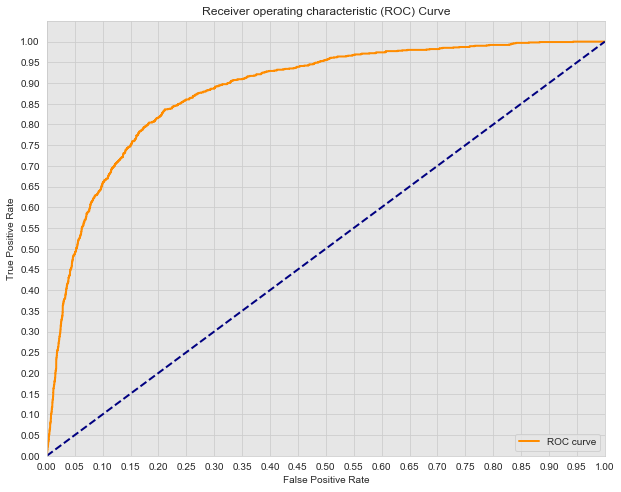

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [338]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8820433758729394


In [339]:
train_prob = model.predict_proba(X_train)[:,1]
        val_prob = model.predict_proba(X_val)[:,1]
        plt.figure(figsize=(7,7))
        for data in [[y_train, train_prob],[y_val, val_prob]]:
            fpr, tpr, thresh = roc_curve(data[0], data[1])
            plt.plot(fpr, tpr)
        Classification.annot(fpr, tpr, thresh)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.ylabel('TPR (power)')
        plt.xlabel('FPR (alpha)')
        plt.legend(['train','val'])
        plt.show()

IndentationError: unexpected indent (<ipython-input-339-80f07a1fad0e>, line 2)

In [235]:
fpr

array([0.00000000e+00, 1.39547865e-04, 2.79095730e-04, ...,
       9.43064471e-01, 9.43064471e-01, 1.00000000e+00])

In [236]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99900299, 1.        ,
       1.        ])

In [244]:
train_proba = log_reg.predict_proba(X_train)[:,1]
val_proba = log_reg.predict_proba(X_val)[:,1]
test_proba = log_reg.predict_proba(X_test)[:,1]

In [270]:
def roc_curve(learner, X_data, y_data, label):
    train_proba = learner.predict_proba(X_data)[:,1]
    plt.figure(figsize=(10, 8)
#         lw = 2
        fpr, tpr, threshold = roc_curve(y_data, train_proba)
        plt.plot(fpr, tpr, color='red', lw=lw, label=label)
        plt.plot([0,1],[0,1], color='black', lw=lw, linestyle='--')
        plot.show()

SyntaxError: invalid syntax (<ipython-input-270-74e602975da3>, line 5)

In [357]:
def roc_plot(learner, X_data, y_data, label):
    train_proba = learner.predict_proba(X_data)[:,1]
    plt.figure(figsize=(10, 8))
    lw = 2
    fpr1, tpr1, threshold1 = roc_curve(y_data, train_proba)
    plt.plot(fpr1, tpr1, color='red',lw=lw, label=label)
    plt.plot([0, 1], [0, 1], color='black',lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate / Alpha')
    plt.ylabel('True Positive Rate / Power')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='upper left')
    plt.show()

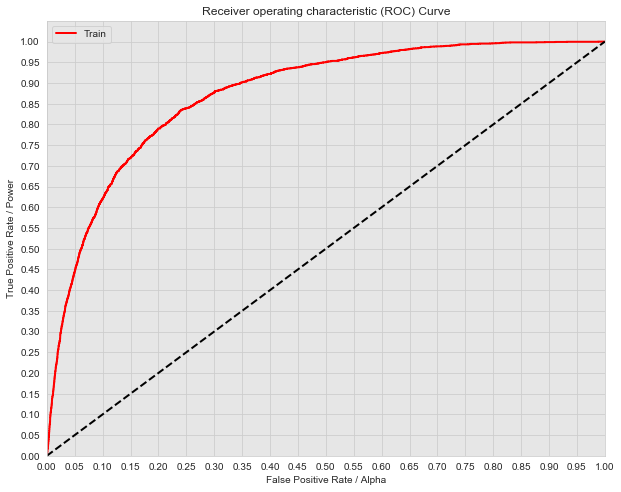

In [358]:
roc_plot(log_reg, X_train, y_train, "Train")

In [289]:
def roc_curvexx(X_train, X_val, X_test):
    train_proba = log_reg.predict_proba(X_train)[:,1]
    val_proba = log_reg.predict_proba(X_val)[:,1]
    test_proba = log_reg.predict_proba(X_test)[:,1]
    plt.figure(figsize=(10, 8))
    lw = 2
    fpr1, tpr1, threshold1 = roc_curve(y_train, train_proba)
    fpr2, tpr2, threshold2 = roc_curve(y_val, val_proba)
    fpr3, tpr3, threshold3 = roc_curve(y_test, test_proba)
    plt.plot(fpr1, tpr1, color='red',lw=lw, label='Train')
    plt.plot(fpr2, tpr2, color='orange',lw=lw, label='Validation')
    plt.plot(fpr3, tpr3, color='purple', lw=lw, label ='Test')
    plt.plot([0, 1], [0, 1], color='black',lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate / Alpha')
    plt.ylabel('True Positive Rate / Power')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='upper left')
    plt.show()

In [290]:
roc_curvexx(X_train, X_val, X_test)

TypeError: roc_curve() missing 2 required positional arguments: 'y_data' and 'label'

<Figure size 720x576 with 0 Axes>

In [238]:
param_grid_01 = {'penalty' : ['l1', 'l2','elasticnet'],
              'dual' : [True, False],
              'C' : [10,100,1000,10000],
              'max_iter' : [10000]
              }

In [142]:
log_reg_gs_01 = GridSearchCV(log_reg,
                         param_grid_01,
                         cv=10,
                         scoring='roc_auc',
                         return_train_score=True)

log_reg_gs_01.fit(X_train,y_train)

//anaconda3/envs/oy-env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/oy-env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
//anaconda3/envs/oy-env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
//anaconda3/envs/oy-env/

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='none',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 100, 1000, 10000], 'dual': [True, False],
                         'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [145]:
log_reg_gs_01_model = log_reg_gs_01.best_estimator_
log_reg_gs_01_model

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
log_reg_gs_01_yval_predproba = log_reg_gs_01_model.predict_proba(X_val)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_val, log_reg_gs_01_yval_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.9129165604786351


In [154]:
y_hat_test_gs_01 = log_reg_gs_01.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat_test_gs_01)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[6994  172]
 [ 656  347]]


In [150]:
param_grid_02 = {'penalty' : ['l2'],
              'dual' : [False],
              'C' : [10000, 20000],
              'max_iter' : [10000]
              }

In [151]:
log_reg_gs_02 = GridSearchCV(log_reg,
                         param_grid_02,
                         cv=5,
                         scoring='roc_auc',
                         return_train_score=True)

log_reg_gs_02.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='none',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10000, 20000], 'dual': [False],
                         'max_iter': [10000], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [152]:
log_reg_gs_02_model = log_reg_gs_02.best_estimator_
log_reg_gs_02_model

LogisticRegression(C=20000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
log_reg_gs_02_yval_predproba = log_reg_gs_02_model.predict_proba(X_val)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_val, log_reg_gs_02_yval_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.9128563366949429


In [160]:
param_grid_03 = {'penalty' : ['l2'],
              'dual' : [False],
              'C' : [20000, 30000],
              'max_iter' : [10000],
               'class_weight': ['balanced']
              }

In [161]:
log_reg_gs_03 = GridSearchCV(log_reg,
                         param_grid_03,
                         cv=5,
                         scoring='roc_auc',
                         return_train_score=True)

log_reg_gs_03.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='none',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [20000, 30000], 'class_weight': ['balanced'],
                         'dual': [False], 'max_iter': [10000],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [162]:
log_reg_gs_03_model = log_reg_gs_03.best_estimator_
log_reg_gs_03_model

LogisticRegression(C=30000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [163]:
log_reg_gs_03_yval_predproba = log_reg_gs_03_model.predict_proba(X_val)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_val, log_reg_gs_03_yval_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.913581752648633


In [164]:
param_grid_04 = {'penalty' : ['l2'],
              'dual' : [False],
              'C' : [30000, 40000, 50000],
              'max_iter' : [10000],
               'class_weight': ['balanced']
              }

In [165]:
log_reg_gs_04 = GridSearchCV(log_reg,
                         param_grid_04,
                         cv=5,
                         scoring='roc_auc',
                         return_train_score=True)

log_reg_gs_04.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='none',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [30000, 40000, 50000],
                         'class_weight': ['balanced'], 'dual': [False],
                         'max_iter': [10000], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [166]:
log_reg_gs_04_model = log_reg_gs_04.best_estimator_
log_reg_gs_04_model

LogisticRegression(C=40000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [167]:
log_reg_gs_04_yval_predproba = log_reg_gs_04_model.predict_proba(X_val)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_val, log_reg_gs_04_yval_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.9135803873739397


Decision Trees

In [175]:
dec_tree = DecisionTreeClassifier(criterion='entropy')

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [177]:
dec_tree_yval_pred = dec_tree.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, dec_tree_yval_pred))

Accuracy:  0.8797747306562194


In [178]:
dec_tree_yval_predproba = dec_tree.predict_proba(X_val)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_val, dec_tree_yval_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.6938829625854055


GridSearchCV using Decision Trees

In [ ]:
param_grid_dt_01 = {'penalty' : ['l2'],
              'dual' : [False],
              'C' : [10000, 20000],
              'max_iter' : [10000]
              }

Bagged Tree

In [179]:
bag_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [181]:
bag_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [183]:
bag_tree.score(X_train, y_train)

0.9108308847535096

In [184]:
bag_tree.score(X_val, y_val)

0.9079333986287953

Random Forest

In [185]:
ran_for = RandomForestClassifier(n_estimators=100, max_depth= 5)
ran_for.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
ran_for.score(X_train, y_train)

0.8937724453150506

In [187]:
ran_for.score(X_test, y_test)

0.8821153139919207

XGBoost

In [192]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_val)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_val, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 91.25%
Validation accuracy: 91.01%


In [214]:
class Learners():
    def __init__(self,learner):
        self.learner = learner
        if self.learner == "Logistic Regression":
            self.model = LogisticRegression()
        if self.learner == "Decision Tree":
            self.instantiate = DecisionTree()
    def fit (self, X_train, y_train):
        self.instantiate.fit(X_train, y_train)

In [ ]:
class Classification():  
    def __init__(self, model, X_train, X_val, y_train, y_val):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.scores_table = pd.DataFrame()
        
        if self.model == 'Logistic Regression':
            self.instantiate = LogisticRegression(fit_intercept=False)
        elif self.model == 'Decision Tree':
            self.instantiate = DecisionTreeClassifier(random_state=50)
        elif self.model == 'Random Forest':
            self.instantiate = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=50)
        elif self.model == "SVM":
            self.instantiate = SVC(probability=True,
                                   random_state=50)

In [215]:
log_reg_test = Learners("Logistic Regression")

In [211]:
log_reg_test

In [201]:
dir(log_reg_test)

['X_train',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'instantiate',
 'learner',
 'y_train']

In [212]:
log_reg_test.fit(X_train,y_train)

//anaconda3/envs/oy-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [198]:
log_reg_test.fit(X_train)

AttributeError: 'Learners' object has no attribute 'fit'